# Replicating plots in [*Rangaraju et al.*](http://dx.doi.org/10.7554/eLife.08833).

Tong Shu Li

We demonstrate the capabilities of our drift plotting functions. To do so, we will try to replicate some figures from [*Rangaraju et al.*](http://dx.doi.org/10.7554/eLife.08833).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys

In [2]:
sys.path.append("..")

In [3]:
from src.plots import plot_p_val_heatmap
from src.plots import plot_drift
from src.plots import plot_multi_density

from src.util import subset

In [4]:
%matplotlib inline

---

## Read the full transcriptome data:

In [5]:
full = pd.read_csv("../data/worms_mianserin/mean_cpm_values.tsv", sep = '\t')

In [6]:
full.shape

(230028, 12)

In [7]:
full.head()

,wormbaseid,symbol,seqname,cpm_val,sample,day_add_drug,day_harvest_rna,drug_conc_uM,drug_given,log_cpm,ref_log_cpm,drift
0,WBGene00022521,ZC132.2,ZC132.2,0.000226,1,1,1,0,water,-8.393649,-8.393649,0.0
1,WBGene00019835,R02F2.6,R02F2.6,0.000228,1,1,1,0,water,-8.386604,-8.386604,0.0
2,WBGene00006011,srx-120,F49C5.2,0.000262,1,1,1,0,water,-8.247548,-8.247548,0.0
3,WBGene00022884,ZK1248.17,ZK1248.17,0.000275,1,1,1,0,water,-8.199831,-8.199831,0.0
4,WBGene00005435,srh-227,C35D6.2,0.000298,1,1,1,0,water,-8.116741,-8.116741,0.0


## Read the filtered transcriptome data:

In [8]:
sub = pd.read_csv("../data/worms_mianserin/avg_annotated_cpm_values.tsv", sep = '\t')

In [9]:
sub.shape

(130548, 11)

In [10]:
sub.head()

,seqname,sample,value,day_harvested,drug_conc_uM,day_drug_added,youngref,trans_drift,drug,wormbaseid,gene_symbol
0,2RSSE.1,1,4.105727,1,0,1,4.105726,-0.012915,water,WBGene00007064,2RSSE.1
1,2RSSE.1,2,7.687213,3,0,1,4.105726,0.562429,water,WBGene00007064,2RSSE.1
2,2RSSE.1,3,7.220500,5,0,1,4.105726,0.562490,water,WBGene00007064,2RSSE.1
3,2RSSE.1,4,3.923197,10,0,1,4.105726,-0.049039,water,WBGene00007064,2RSSE.1
4,2RSSE.1,5,4.042023,3,50,1,4.105726,-0.030335,mianserin,WBGene00007064,2RSSE.1


---

## CPM value density plots of all samples (full transcriptome)

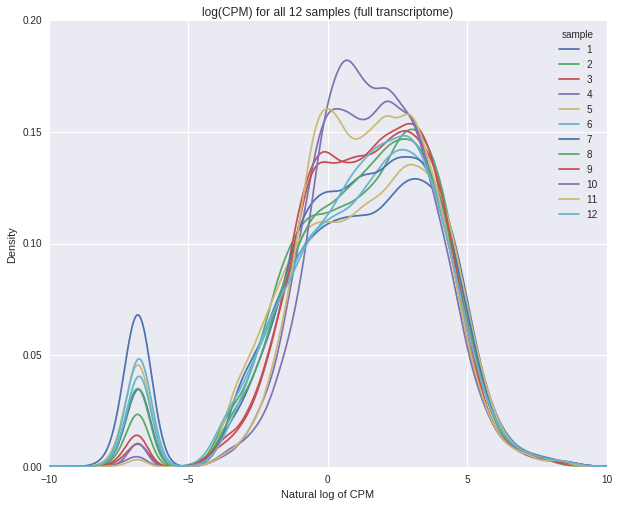

In [11]:
fig = plot_multi_density(
    full, "seqname", "sample", "log_cpm", rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-10, 10))
fig.set_xlabel("Natural log of CPM")
fig.set_title("log(CPM) for all 12 samples (full transcriptome)")

## CPM value density for all samples (subset)

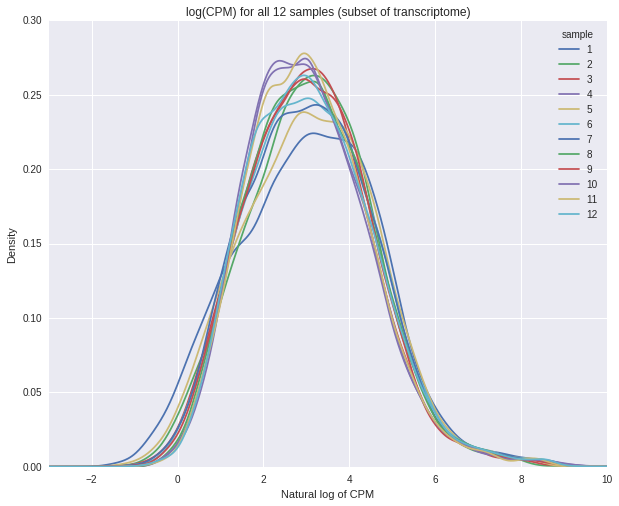

In [12]:
temp = sub.copy()
temp["log_value"] = np.log(temp["value"])

fig = plot_multi_density(
    temp, "seqname", "sample", "log_value",
    rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-3, 10))
fig.set_xlabel("Natural log of CPM")
fig.set_title("log(CPM) for all 12 samples (subset of transcriptome)")

## Examine drift distributions (full transcriptome)

Plot the drift for all 11 samples (drift is zero for sample 1 by definition).

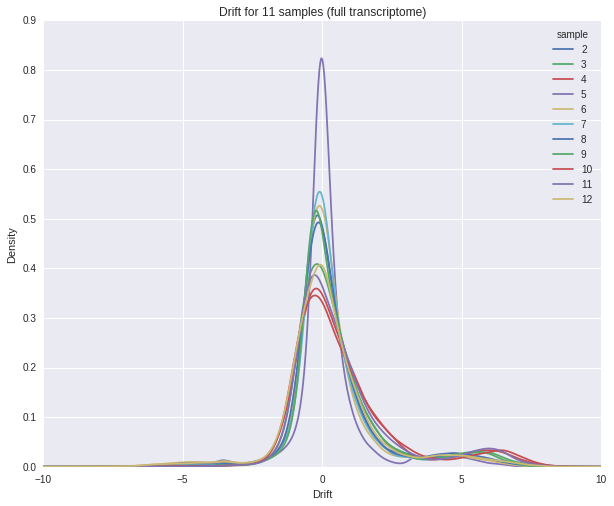

In [13]:
fig = plot_multi_density(
    full.query("sample != 1"), "seqname", "sample", "drift",
    rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-10, 10))
fig.set_title("Drift for 11 samples (full transcriptome)")
fig.set_xlabel("Drift")

One sample has almost all of its genes with zero drift (the big peak at 0). Which sample is it?

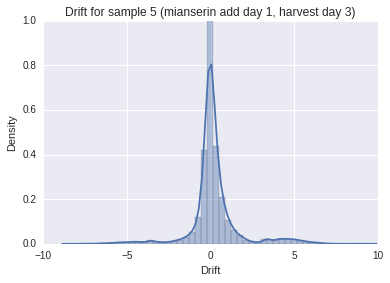

In [14]:
fig = sns.distplot(full.query("sample == 5")["drift"])
fig.set_title("Drift for sample 5 (mianserin add day 1, harvest day 3)")
fig.set_ylabel("Density")
fig.set_xlabel("Drift")

So there does seem to be a problem with sample five. Its drift distributions are very centered around zero, but its CPM distribution looks normal:

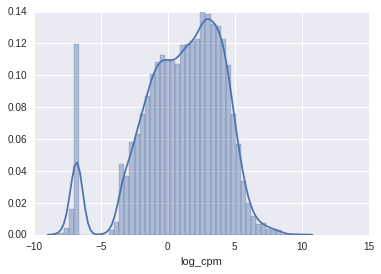

In [15]:
sns.distplot(full.query("sample == 5")["log_cpm"])

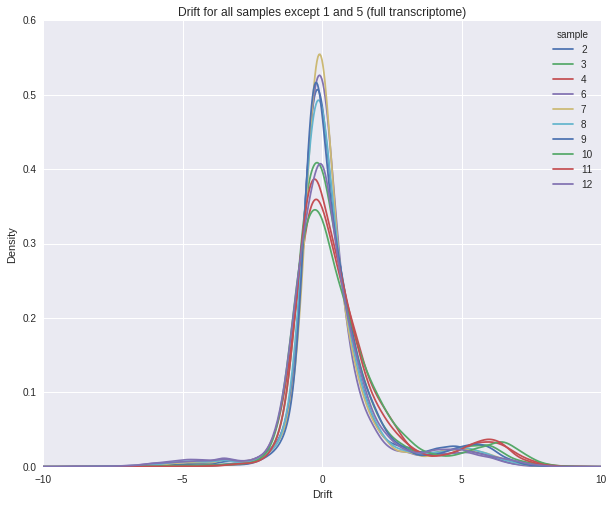

In [16]:
fig = plot_multi_density(
    full.query("sample not in(1, 5)"), "seqname", "sample", "drift",
    rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-10, 10))
fig.set_title("Drift for all samples except 1 and 5 (full transcriptome)")
fig.set_xlabel("Drift")

## Drift distribution for subset of transcriptome

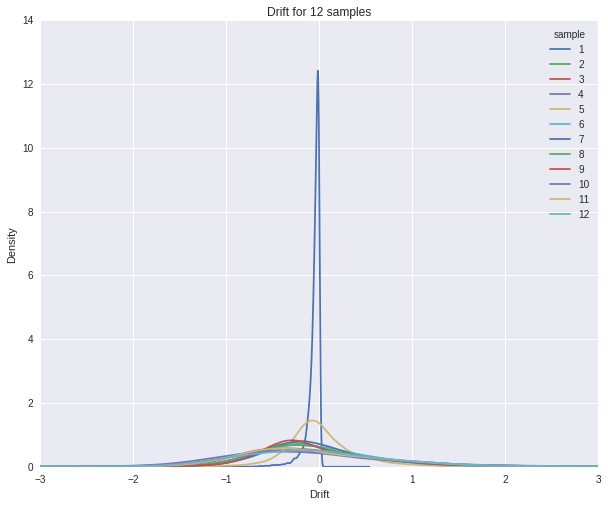

In [17]:
fig = plot_multi_density(
    sub, "seqname", "sample", "trans_drift",
    rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-3, 3))
fig.set_title("Drift for 12 samples")
fig.set_xlabel("Drift")

Sample 1 is skewing the plot:

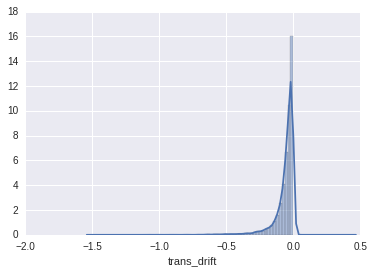

In [18]:
sns.distplot(sub.query("sample == 1")["trans_drift"])

The first sample, by virtue of being the reference, has drift values which are not always exactly zero, but which is highly skewed. We will replot with sample 1 removed.

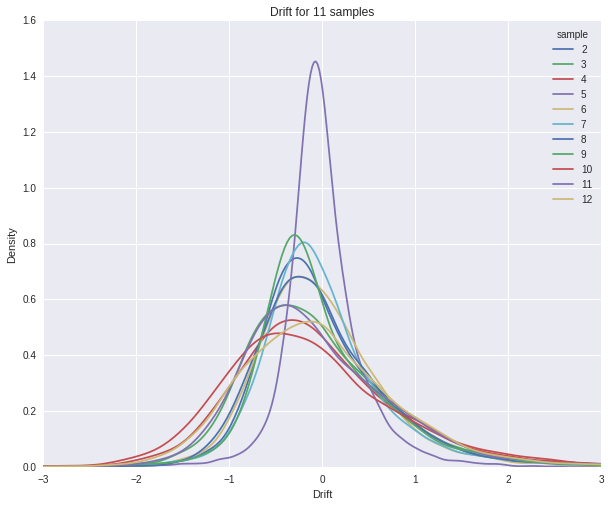

In [19]:
fig = plot_multi_density(
    sub.query("sample != 1"), "seqname", "sample", "trans_drift",
    rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-3, 3))
fig.set_title("Drift for 11 samples")
fig.set_xlabel("Drift")

Which sample has the high amount of density at zero drift?

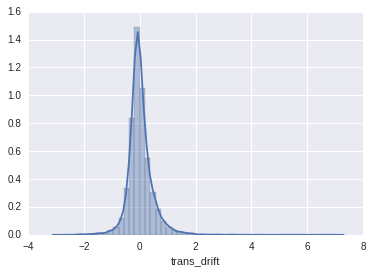

In [20]:
sns.distplot(sub.query("sample == 5")["trans_drift"])

Again we see that sample 5 is giving us problems. It looks drastically different in drift than the other samples.

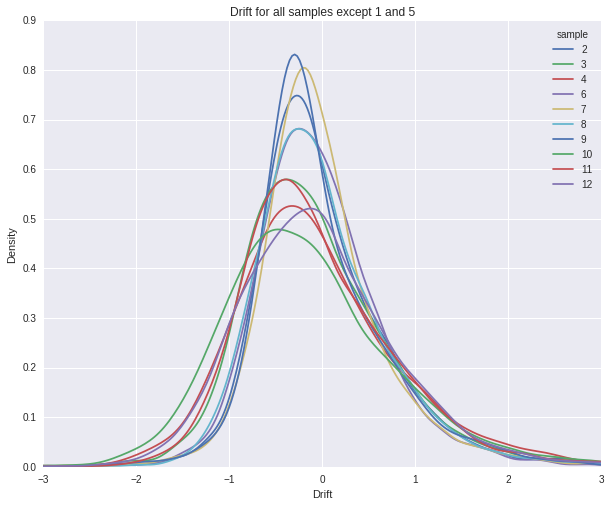

In [21]:
fig = plot_multi_density(
    sub.query("sample not in(1, 5)"), "seqname", "sample", "trans_drift",
    rc = {"figure.figsize": (10, 8)}
)
fig.set_xlim((-3, 3))
fig.set_title("Drift for all samples except 1 and 5")
fig.set_xlabel("Drift")

The remaining samples still have a healthy amount of variation, but nothing as dramatic as that of sample 5.

---

## Drift for water treated worms, all genes (full)

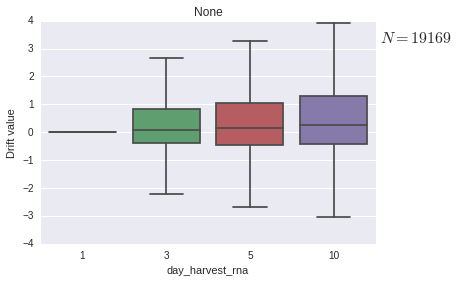

In [22]:
temp = full.query("drug_given == 'water'")

plot_drift(
    "box", temp,
    "day_harvest_rna", "drift", "seqname"
)

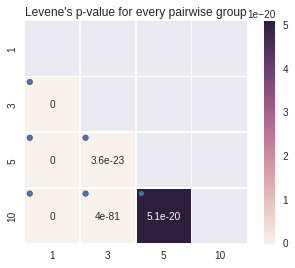

In [23]:
plot_p_val_heatmap(temp, "day_harvest_rna", "drift", circles = True)

## Plot drift for all genes in water treated worms at different days of age (subset)

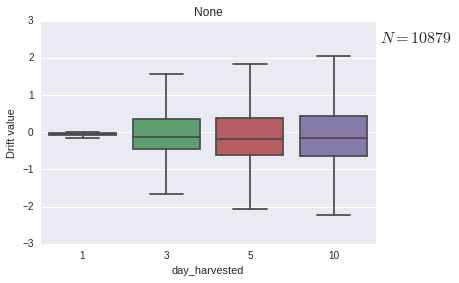

In [24]:
temp = sub.query("drug == 'water'")
                  
plot_drift(
    "box", temp,
    "day_harvested", "trans_drift", "seqname"
)

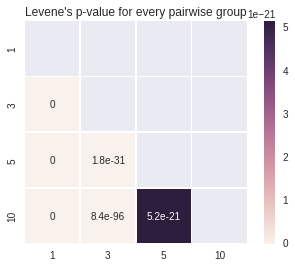

In [25]:
plot_p_val_heatmap(temp, "day_harvested", "trans_drift")

## Effect of mianserin on drift (full transcriptome)

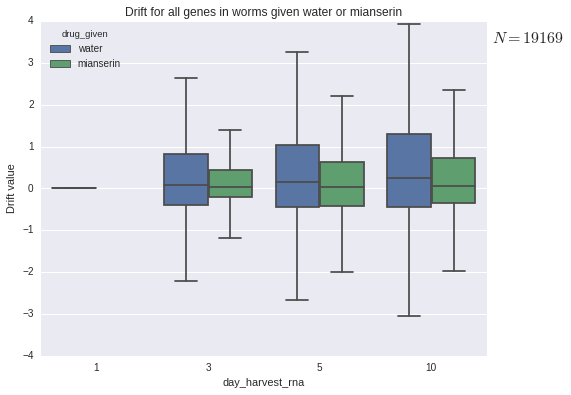

In [26]:
temp = full.query("day_add_drug == 1 & drug_conc_uM in(0, 50)")

plot_drift(
    "box", temp, "day_harvest_rna", "drift", "seqname",
    groupby = "drug_given", rc = {"figure.figsize": (8, 6)},
    title = "Drift for all genes in worms given water or mianserin"
)

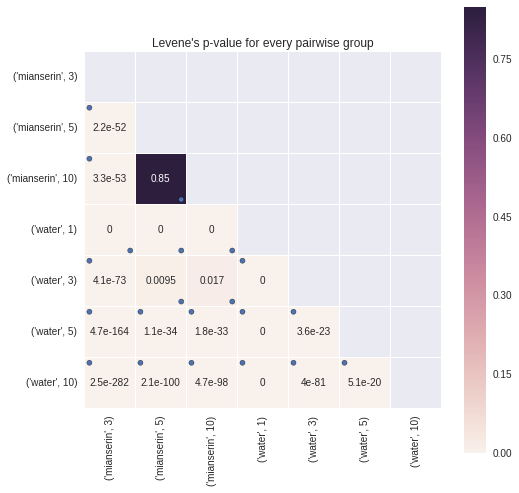

In [27]:
plot_p_val_heatmap(
    temp, ["drug_given", "day_harvest_rna"], "drift",
    rc = {"figure.figsize": (8, 8)}, circles = True
)

## Effect of mianserin on drift (subset)

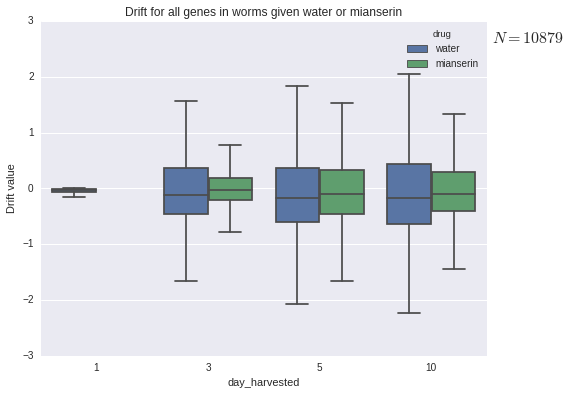

In [28]:
temp = sub.query("day_drug_added == 1 & drug_conc_uM in(0, 50)")

plot_drift(
    "box", temp, "day_harvested", "trans_drift", "seqname",
    groupby = "drug", rc = {"figure.figsize": (8, 6)},
    title = "Drift for all genes in worms given water or mianserin"
)

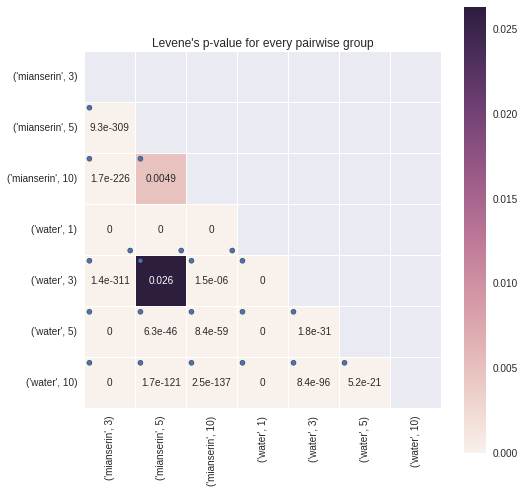

In [29]:
plot_p_val_heatmap(
    temp, ["drug", "day_harvested"], "trans_drift",
    rc = {"figure.figsize": (8, 8)}, circles = True
)